# Analystic Hotel Booking demand
### Muhammad bari alfattah




### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Sebuah Perusahaan Perhotelan berada diportugal  yang menawarkan jasa penginapan dengan pelanggan  yang terdiri dari berbagai macam turis dari banyak negara,ingin meningkatkan keuntungan melalui pelanggan-pelanggan yang memesan terlebih dahulu apakah akan membatalkan pesananya atau tidak.sehingga dapat meningkatkan keuntungan dari penyediaan tempat dan ketersediaan ruangannya.

**Problem Statement :**

proses dari penyediaan ruangan terhadap orang yang memesan terlebih dahulu memakan banyak waktu dan tenaga jika perhotelan memproses semua pesanan yang datang.Jadi perusahan perhotelan tersebut perlu meningkatkan nilai efisiensi dari pemesanan yang ada sehingga dapat mengetahui pelanggan mana yang benar-benar bersedia untuk memesan layanan.

Jika pelanggan dinilai akan membatalkan pesanan,maka dapat dimasukkan kepada non-prioritas terlebih dahulu sehingga pesanan tersebut dapat tidak diproiritaskan sehingga waktu dan tenaga tidak terbuang secara sia-sia.



**Goals :**

berdasarkan permasalahan tersebut, bisnis perhotelan ingin memiliki kemampuan untuk memprediksi  kemungkinan pelanggan akan memesan /booking seacara pasti atau tidak.
Perhotelan juga ingin mengetahui apa/faktor/variabel 
apa yang membuat seorang kandidat mau menginap/tidak , sehingga dapat lebih baik melihat pelanggan yang potensial untuk menginap/tidak.

**Analytic Approach :**

Jadi akan dilakukan analisis data untuk menemukan pola yang membedakan pelanggan yang ingin memesan atau tidak.
Kemudian akan dibangun  model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang pelanggan akan menginap/membatalkan pesanan.

In [25]:
pip install missingno


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Metric evaluation :**

Type 1 error : False Positive  

Konsekuensi: sia-sianya waktu,uang dan tenaga

Type 2 error : False Negative  
Konsekuensi: kehilangan Pelanggan yang benar-benar ingin menginap

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi waktu,uang dan tenaga  dari bisnis perhotelan tersebut, tetapi tanpa membuat terjadinya kehilangan pelanggan yang akan memesan secara pasti. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive. Jadi nanti metric utama yang akan kita gunakan adalah roc_auc.

### **Data Understanding**

In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
 #plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
#load dataset
df=pd.read_csv(r'C:/Users/bari alfattah/Desktop/data kaggle/data_hotel_booking_demand.csv')
#Mengetahui data set
display(df.info(),df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


None

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [3]:
#melihat isi dari kolom kategori dan mengecek tipe data
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

country
['IRL' 'FRA' 'PRT' 'NLD' 'ESP' 'UMI' 'CN' 'LUX' 'BRA' 'BEL' 'JPN' 'DEU'
 'ITA' 'CHE' 'GBR' 'AGO' 'SRB' 'COL' 'CHN' 'SWE' 'AUT' 'CIV' 'CZE' 'POL'
 'USA' 'SGP' 'RUS' 'ROU' 'DNK' 'IND' 'MAR' 'PHL' 'ARG' 'ISL' 'ZAF' 'LBN'
 'MOZ' 'TUR' 'BGD' 'MEX' 'CAF' 'NOR' 'FIN' 'UKR' 'EGY' 'ISR' nan 'KOR'
 'AZE' 'HUN' 'AUS' 'EST' 'CHL' 'SVN' 'PRY' 'ABW' 'ALB' 'LTU' 'ARE' 'HRV'
 'SAU' 'NZL' 'LVA' 'ATA' 'KAZ' 'DZA' 'TWN' 'CRI' 'BIH' 'BGR' 'IRQ' 'OMN'
 'VEN' 'IDN' 'GEO' 'MLT' 'IRN' 'BLR' 'URY' 'LBY' 'TUN' 'BEN' 'MYS' 'MWI'
 'GRC' 'CYP' 'CPV' 'HKG' 'PRI' 'MKD' 'MUS' 'IMN' 'PAN' 'NGA' 'GLP' 'KHM'
 'PER' 'QAT' 'SEN' 'MAC' 'SVK' 'BHR' 'ECU' 'SYC' 'BOL' 'TJK' 'LCA' 'MDV'
 'SYR' 'ZMB' 'LIE' 'THA' 'MNE' 'BRB' 'CMR' 'JEY' 'GTM' 'LKA' 'JOR' 'TZA'
 'AND' 'ARM' 'GIB' 'VNM' 'PAK' 'JAM' 'DOM' 'KWT' 'LAO' 'RWA' 'FRO' 'GAB'
 'ETH' 'CUB' 'COM' 'GNB' 'GGY' 'NIC' 'TGO' 'TMP' 'CYM' 'GHA' 'SLE' 'BWA'
 'NCL' 'UZB' 'SUR' 'SDN' 'PLW' 'MLI' 'MMR' 'BFA' 'SLV' 'BDI' 'ZWE' 'UGA'
 'DMA' 'VGB' 'KIR' 'KEN' 'MYT' 'KNA' 'AIA']
--

## tipe data
dapat diketahui dari data bahwa:

Categorical -  is_canceled, customer_type, country, market_segment, reserved_room_type deposit_type

Numerical - previous_cancellations, booking_changes, , days_in_waiting_list,  required_car_parking_spaces, total_of_special_requests

Untuk data pada is canceled dibagi menjadi 2 bagian yaitu data saat booking dibatalkan yaitu:1 dan data tidak dibatalkan :0

In [4]:
# melihat pada data df.hist(figsize=(20,14))
plt.show()

# Data cleaning


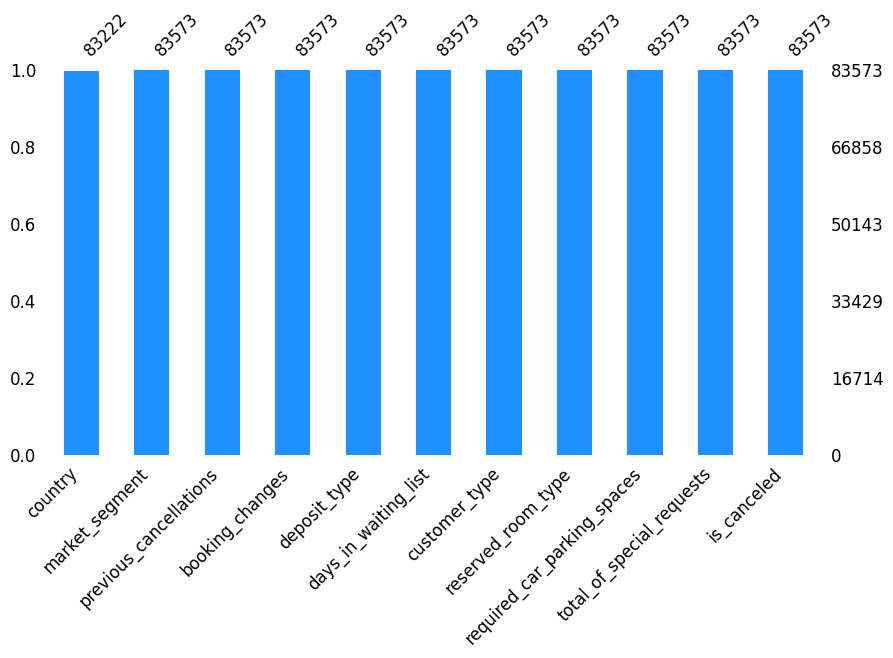

In [5]:
#mengecek data kosong

(df.isnull().sum(),df.isnull().any(),df.isnull().all())
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);
#terdapat data kosong pada kolom country Yang akan diisi dengan menggunakan modus pada data tersebut

<Axes: >

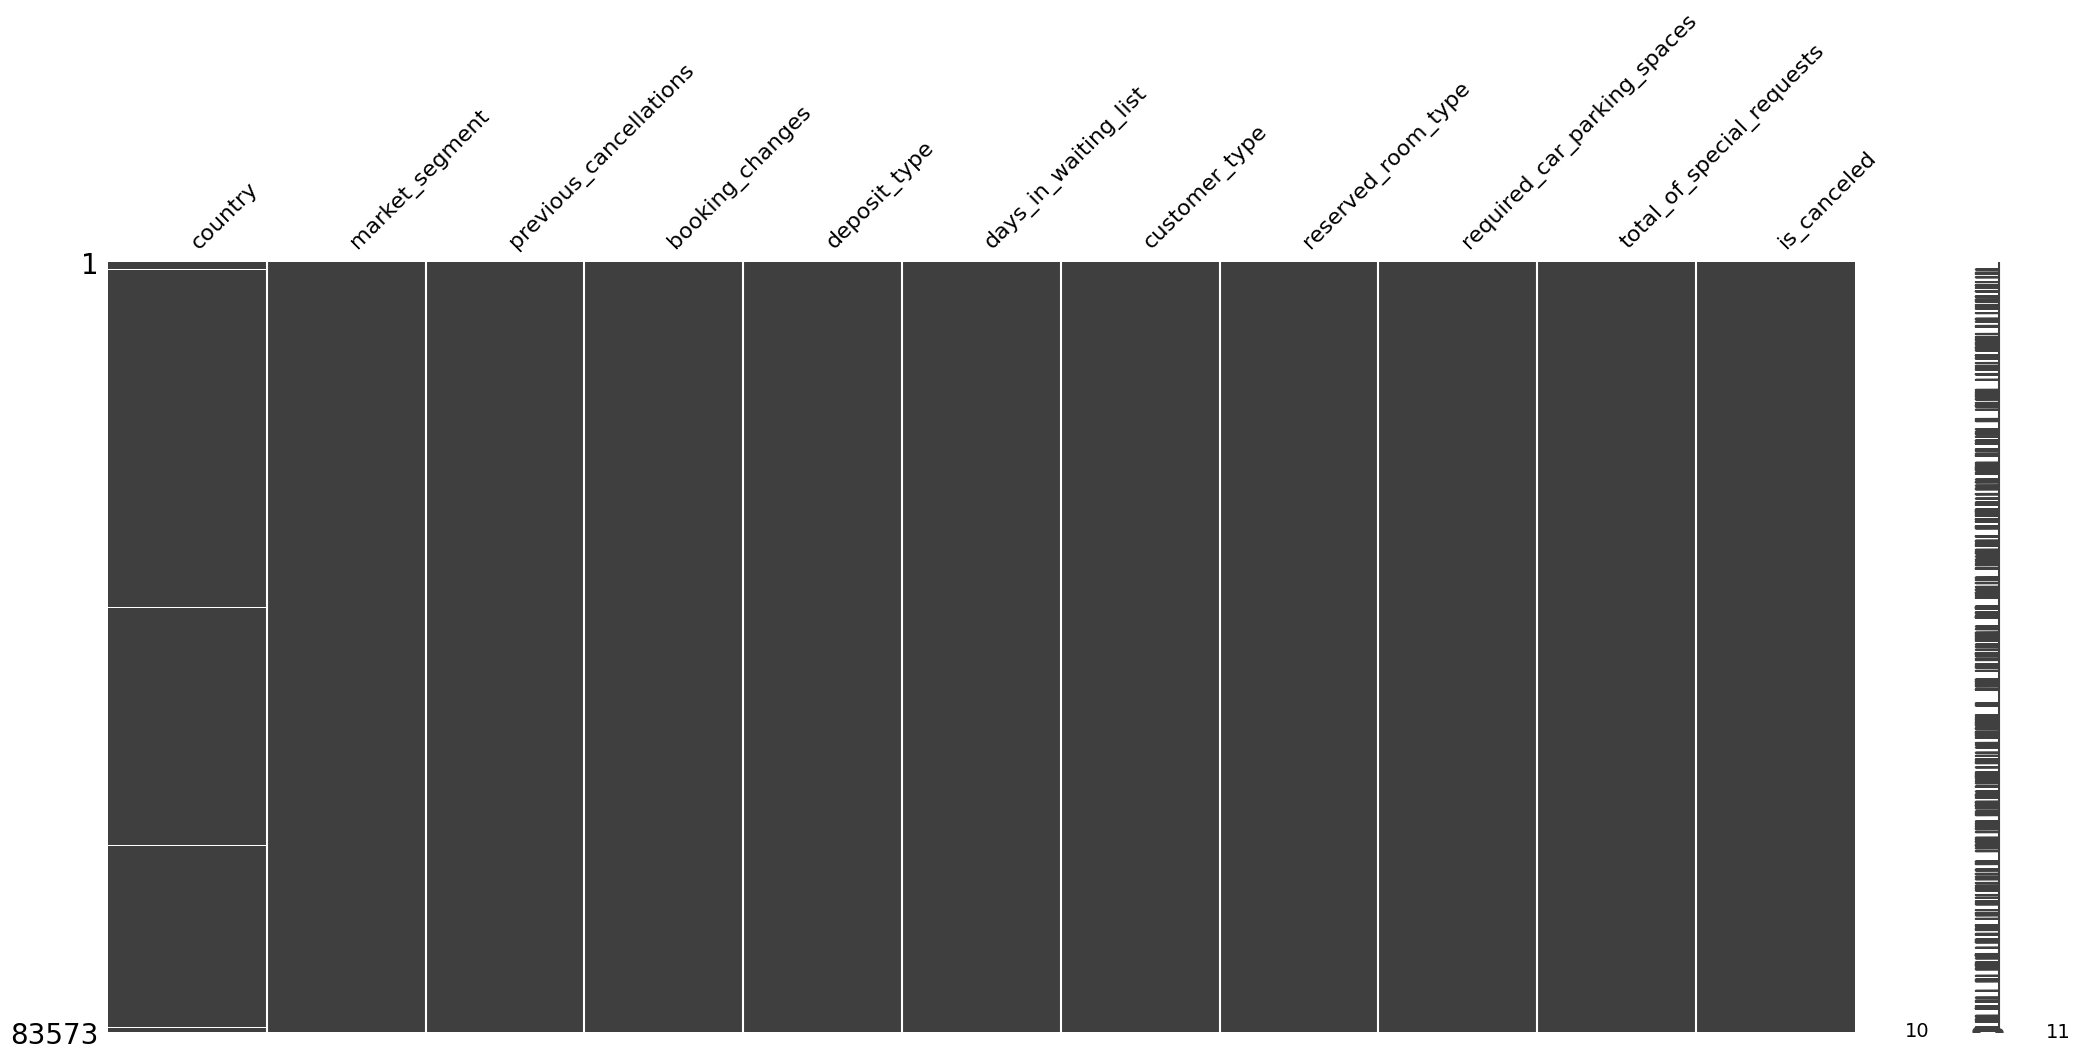

In [5]:
#melihat persebaran data kosong dengan 
missingno.matrix(df)

Data kosong pada country memiliki nilai yang berpola namun karena datanya kategorikal akan digunakan modus sebagai pengisi data kosong

In [6]:
#mengisi data kosong pada country dengan modus
imp_mode = SimpleImputer(strategy='most_frequent')
df[['country']]= imp_mode.fit_transform(df[['country']])
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

country                        False
market_segment                 False
previous_cancellations         False
booking_changes                False
deposit_type                   False
days_in_waiting_list           False
customer_type                  False
reserved_room_type             False
required_car_parking_spaces    False
total_of_special_requests      False
is_canceled                    False
dtype: bool

country                        False
market_segment                 False
previous_cancellations         False
booking_changes                False
deposit_type                   False
days_in_waiting_list           False
customer_type                  False
reserved_room_type             False
required_car_parking_spaces    False
total_of_special_requests      False
is_canceled                    False
dtype: bool

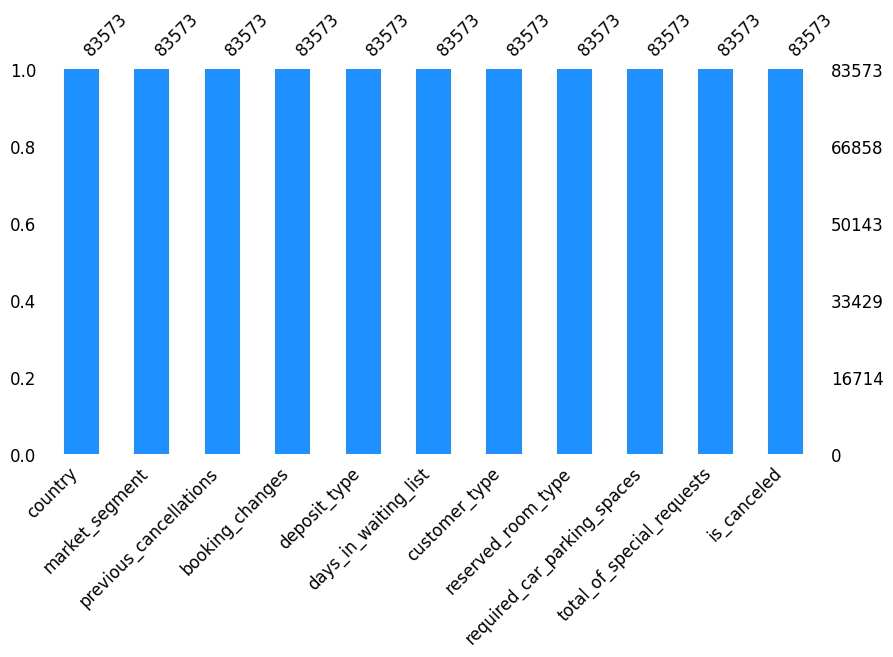

In [7]:
#melihat apakah data sudah terisi apa belum
(df.isnull().sum(),df.isnull().any(),df.isnull().all())
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

display(df.isnull().sum(),
df.isnull().any(),
df.isnull().all())

Data kosong pada country sudah terisi dengan data terbanyak

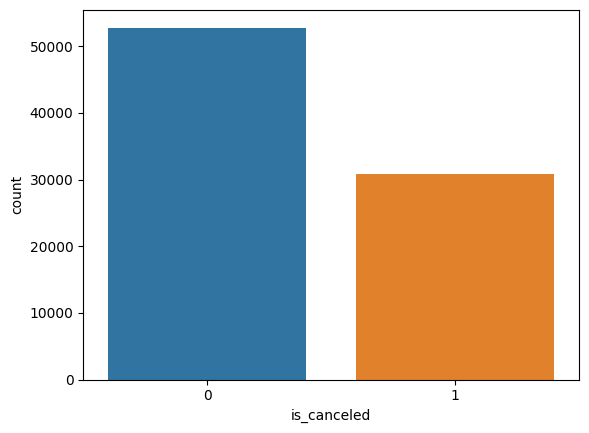

In [7]:
#melihat data imbalance atau tidak 
sns.countplot(data=df, x = 'is_canceled')
plt.show()

data Tidak imbalance sesuai dengan plot diatas

## Data Analysis

In [ ]:
#melihat persebaran data pada data numerical dab mengecek outlier 

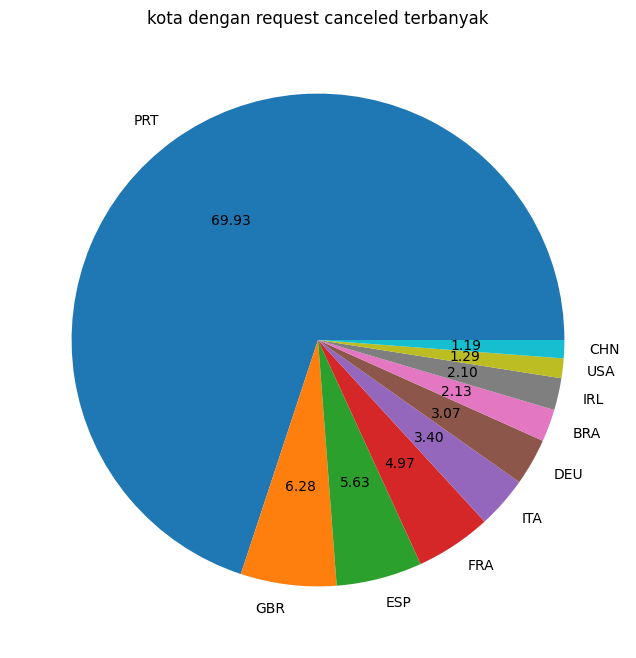

In [8]:
#Mengecek kota dengan kemungkinan dibatalkan terbanyak
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('kota dengan request canceled terbanyak')
plt.pie(top_10_country,autopct = '%.2f',labels = top_10_country.index)
plt.show()

Terlihat bahwa kebanyakan dibatalkan pada kota asal yaitu adalah portugal. 

Text(0, 0.5, 'Count')

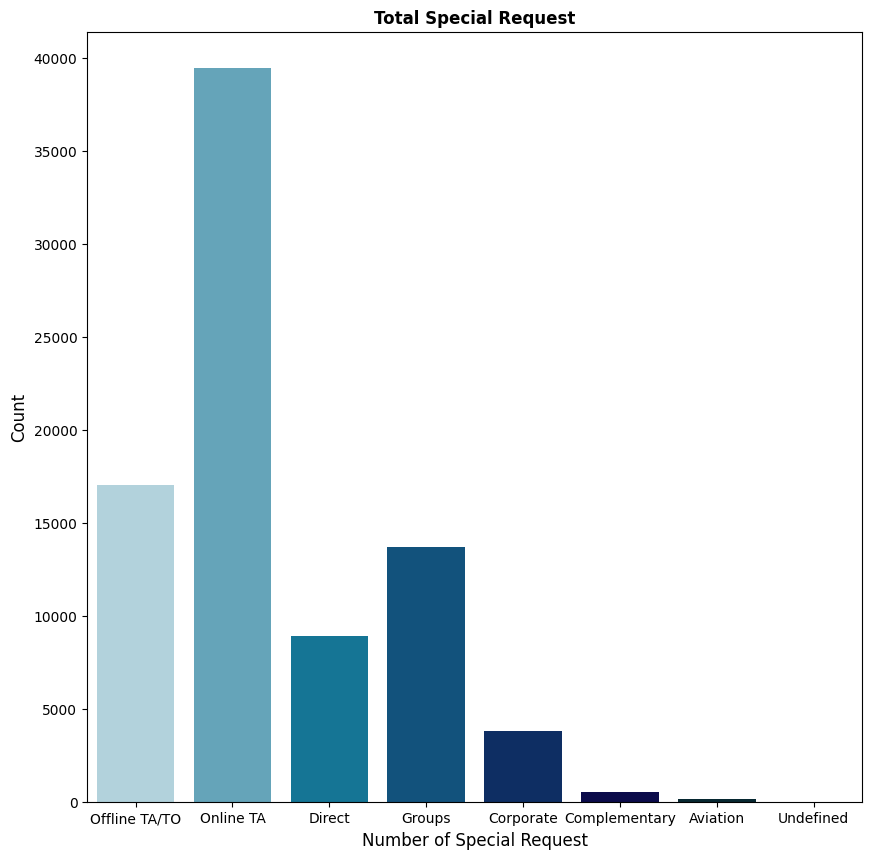

In [12]:
# `total_of_special_requests` graph

plt.figure(figsize=(10,10))
sns.countplot(x='market_segment', data=df, palette = 'ocean_r')
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.ylabel('Count', fontsize=12)

Terlihat persebaran pada total special request lebih banyak terjadi pada pemesanan yang memesan secara online.

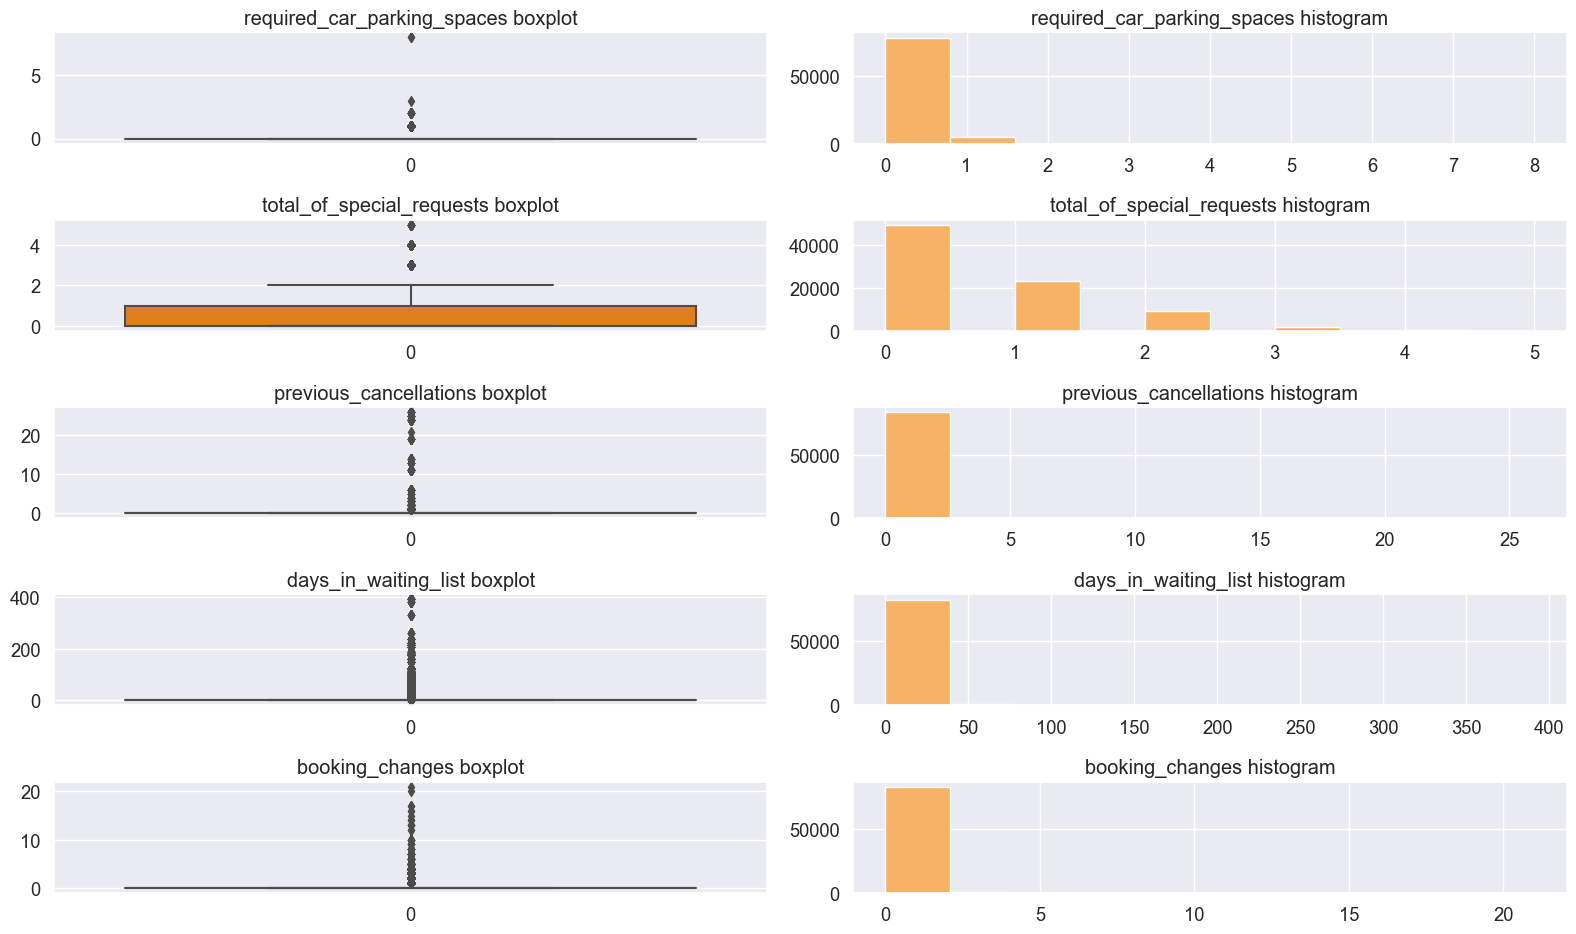

In [30]:
#meihat perbesebaran outlier pada data numerik
features = ['required_car_parking_spaces', 'total_of_special_requests', 'previous_cancellations', 'days_in_waiting_list', 'booking_changes']


#Creating a boxplot and a histogram for outlier detection

n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (16, 28))

for feature in features:
    plt.subplot(15,2,n)
    sns.boxplot(df[feature], palette = 'autumn').set(xlabel = None)
    plt.title(f'{feature} boxplot')
    n = n + 1
    
    plt.subplot(15,2,n)
    plt.hist(df[feature], color = '#f7b267')
    plt.title(f'{feature} histogram')
    n = n + 1
    plt.tight_layout()

terlihat persebaran data dari diagram diatas tidak terjadi distribusi normal dalam grafik numerical dari data tersebut.

In [15]:
#hubungan antara negara dan parking spaces
df.groupby(['country'])['required_car_parking_spaces'].sum().sort_values(ascending=False)

country
PRT    2276
ESP     851
FRA     397
GBR     384
DEU     174
       ... 
GHA       0
GGY       0
GEO       0
GAB       0
ZWE       0
Name: required_car_parking_spaces, Length: 162, dtype: int64

<Axes: xlabel='country'>

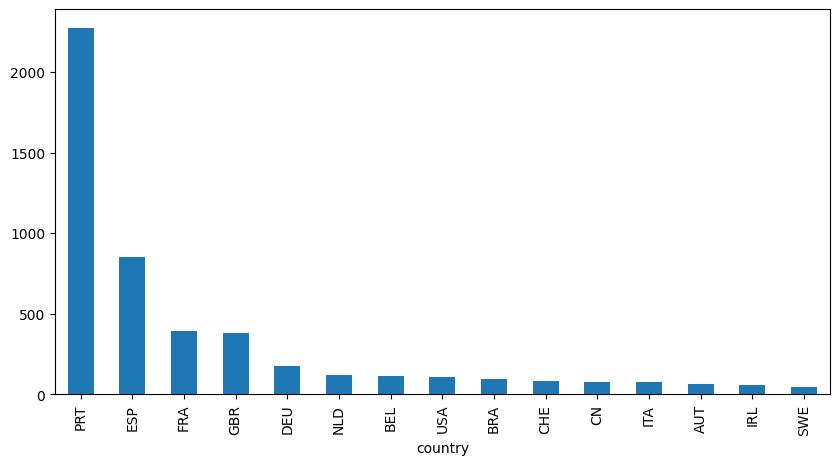

In [16]:
df.groupby(['country'])['required_car_parking_spaces'].sum().sort_values(ascending=False).head(15).plot.bar(figsize=(10,5))

Terlihat bahwa kebanyakan negara dieropa yang bisa berjalan melalui darat lebih cenderung untuk memesan tempat parkir

Text(0, 0.5, 'Count')

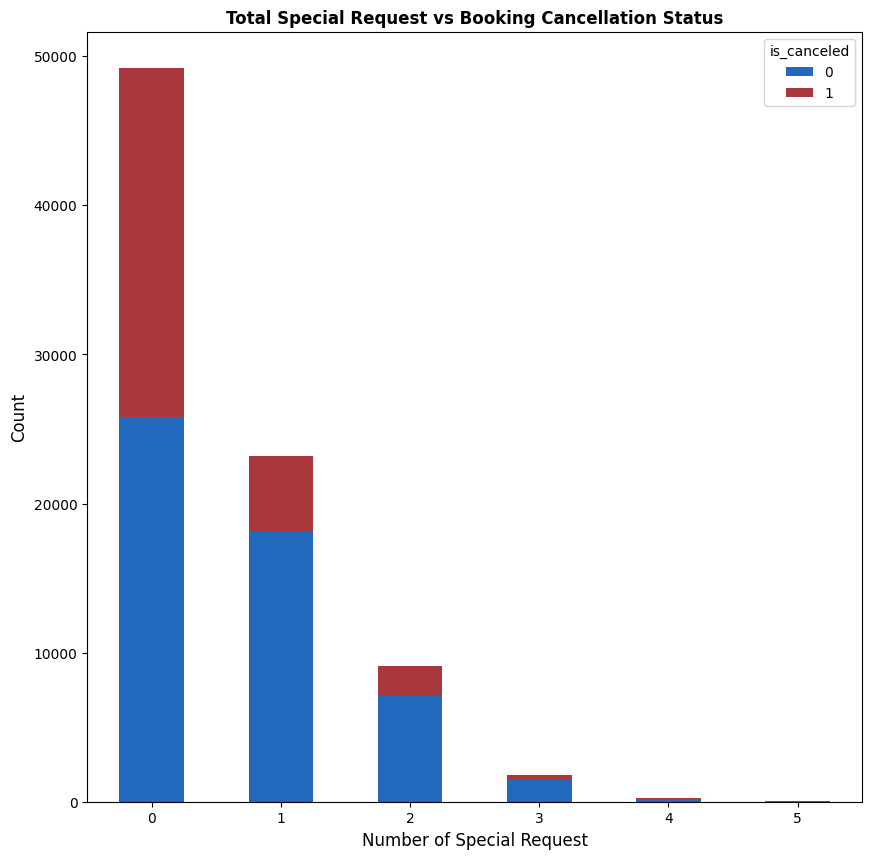

In [17]:
# Group by `total_of_special_requests` and `is_canceled` features

group_adr_request = df.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
group_adr_request.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,10))
plt.title('Total Special Request vs Booking Cancellation Status', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

terlihat semakin sedikit kemungkinan untuk memesan semakin tinggi juga untuk membatalkan pesanan

Text(0, 0.5, 'Count')

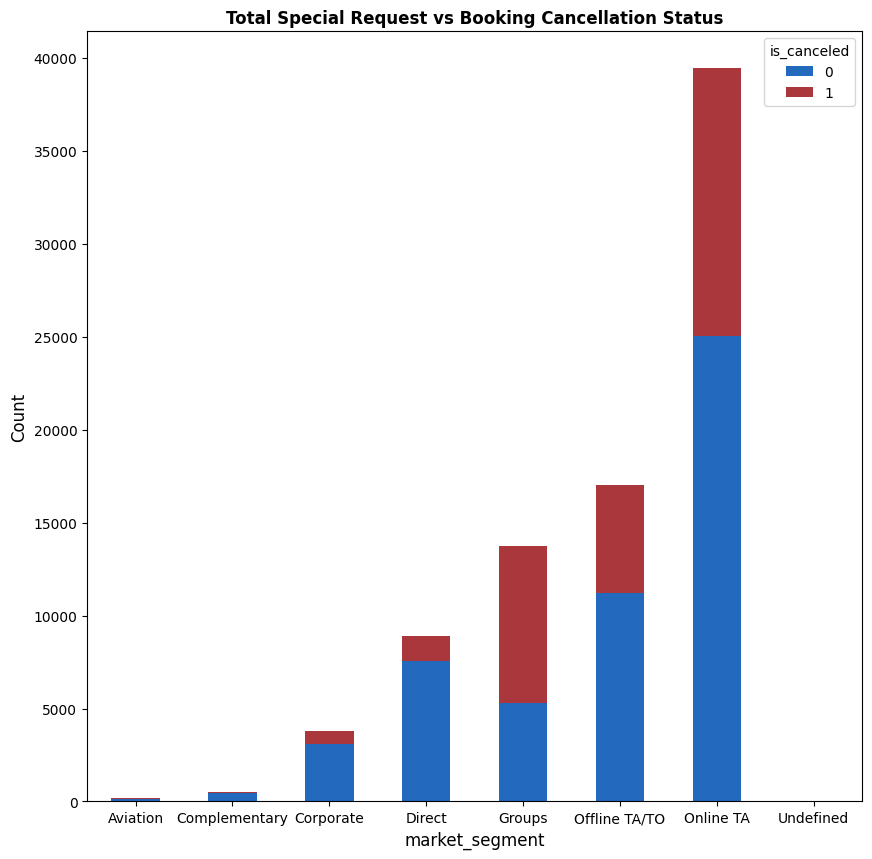

In [25]:
# Group by market segment and `is_canceled` features

group_adr_request = df.groupby([ 'market_segment', 'is_canceled']).size().unstack(fill_value=0)
group_adr_request.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,10))
plt.title('Total Special Request vs Booking Cancellation Status', weight='bold')
plt.xlabel('market_segment', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

untuk market segment dan grous terlihat bahwa cenderung untuk membatalkan pesanan berbeda dari segment lain yang cenderung untuk tidak membatalkan pemesanan

Text(0, 0.5, 'Count')

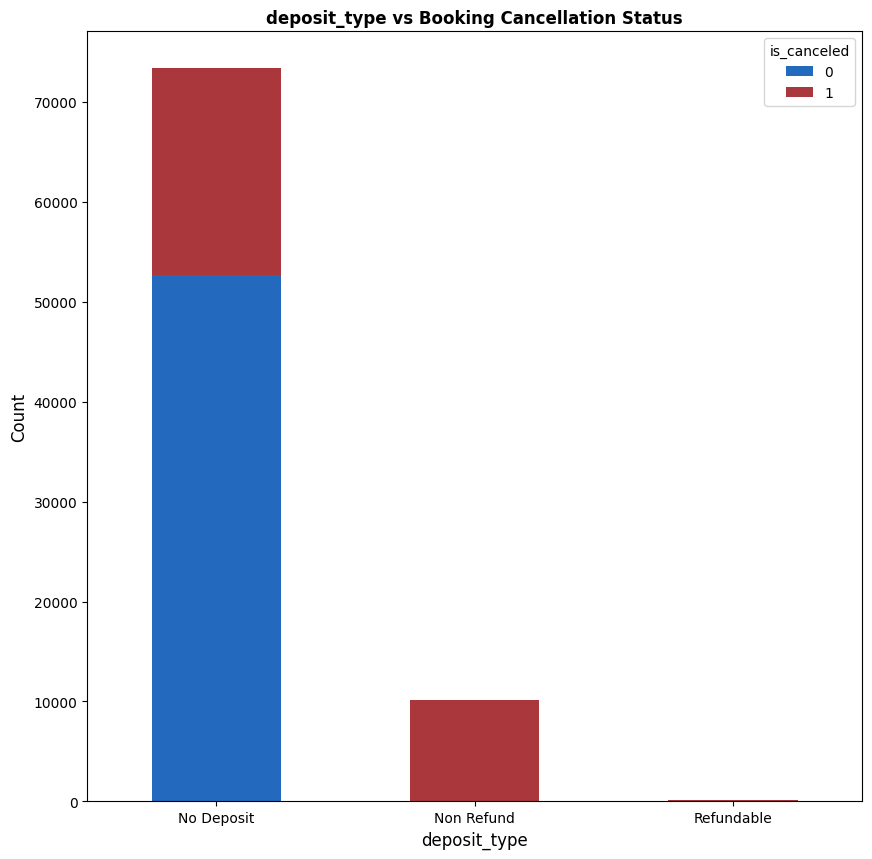

In [23]:
# Group by 'deposit_type` and `is_canceled` features

group_adr_request = df.groupby([ 'deposit_type', 'is_canceled']).size().unstack(fill_value=0)
group_adr_request.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,10))
plt.title('deposit_type vs Booking Cancellation Status', weight='bold')
plt.xlabel('deposit_type', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

Terlihat bahwa terjadi hubungan antara no deposit dan non refund dan yang menarik adalah saat tidak terjadi non refund kecenderungan untuk membatalkan hampir bernilai 100 persen dari data yang ada

Terlihat bahwa semakin sedikit permintaan terhadap permintaan maka semakin tinggi terjadi pembatalan pemesanan

In [ ]:
#mengecek keunikan tiap kolom 

Dapat dilihat dari grafik diatas kebutuhan untuk parkir kebanyakan berada pada sekitar portugal

## Preprocessing


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83573 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


Persebaran data dibagi menjadi 9 data yang akan menentukan hasil dari data is canceled

In [10]:
df.nunique()

country                        162
market_segment                   8
previous_cancellations          15
booking_changes                 19
deposit_type                     3
days_in_waiting_list           115
customer_type                    4
reserved_room_type              10
required_car_parking_spaces      5
total_of_special_requests        6
is_canceled                      2
dtype: int64

akan dirubah fitur kategorikal dengan encoding sehingga mempermudah penilaian diantaranya :

Categorical -  is_canceled, customer_type, country, market_segment, reserved_room_type deposit_type

Numerical - previous_cancellations, booking_changes, , days_in_waiting_list,  required_car_parking_spaces, total_of_special_requests


1. merubah fitur `country` dengan Binary encoding karena data unique banyak dan tidak memiliki ordinal
2. merubah fitur `costumer type` ke one hot ecoding karena data unique sedikit dan tidak memiliki ordinal
3. merubah fitur `market segment` ke one hot ecoding karena data unique sedikit dan tidak memiliki ordinal
4.  merubah fitur `reserved room type` ke one hot ecoding encoding karena data  unique sedikit dan tidak memiliki ordinal
5. merubah fitur `deposit type` ke one hot  encoding karena data memiliki one hot ecoding 
6. tidak merubah fitur `is_cancelled` karena sudah berisi one hot encoding


## Data Preparation

Variabel y adalah data yang menjadi tujuan dan x adalah variabel yang akan menjadi penilaian machine learning

In [90]:
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [102]:
df['reserved_room_type'].unique()

array(['A', 'E', 'D', 'F', 'B', 'G', 'C', 'H', 'L', 'P'], dtype=object)

In [33]:
#Melakukan encoding dengan menggunakan fitur transformer yang akan megabungnkan berbagai encoding dari onehot sampai binary
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'),  ['market_segment','deposit_type', 'customer_type','reserved_room_type']),
   ##('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['reserved_room_type'],),
   ('binary', ce.BinaryEncoder(), ['country'])
], remainder='passthrough',)

In [34]:
#membuat variabel yang akan jadi penilaian machine larning 
x = df.drop(columns=['is_canceled'])
y = df['is_canceled']

In [35]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['market_segment', 'deposit_type',
                                  'customer_type', 'reserved_room_type']),
                                ('binary', BinaryEncoder(), ['country'])])

## Data splitting

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [37]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

66858
16715
66858
16715


In [38]:
#membuat dataframe untuk mendapatkan nama tiap fitur 
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head(10)

,onehot__market_segment_Aviation,onehot__market_segment_Complementary,onehot__market_segment_Corporate,onehot__market_segment_Direct,onehot__market_segment_Groups,onehot__market_segment_Offline TA/TO,onehot__market_segment_Online TA,onehot__market_segment_Undefined,onehot__deposit_type_No Deposit,onehot__deposit_type_Non Refund,onehot__deposit_type_Refundable,onehot__customer_type_Contract,onehot__customer_type_Group,onehot__customer_type_Transient,onehot__customer_type_Transient-Party,onehot__reserved_room_type_A,onehot__reserved_room_type_B,onehot__reserved_room_type_C,onehot__reserved_room_type_D,onehot__reserved_room_type_E,onehot__reserved_room_type_F,onehot__reserved_room_type_G,onehot__reserved_room_type_H,onehot__reserved_room_type_L,onehot__reserved_room_type_P,binary__country_0,binary__country_1,binary__country_2,binary__country_3,binary__country_4,binary__country_5,binary__country_6,binary__country_7,remainder__previous_cancellations,remainder__booking_changes,remainder__days_in_waiting_list,remainder__required_car_parking_spaces,remainder__total_of_special_requests
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# modelling data

In [39]:
#memaskkan metode ke variabel
dt = DecisionTreeClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

akan digunakan 6 permodelan untuk data klasifikasi tersebut yaitu decision tree,logistic regression,xgb classifier,dan lgbm serta randomforest dan kneighbors

### Model Benchmarking : menggunakan  K-Fold

In [40]:
models = [lr,knn,dt,rf,xgb,lgbm]
skor=[]
rata2=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    skor.append(model_cv)
    rata2.append(model_cv.mean())
    std.append(model_cv.std())
#membuat dataframe perhitungan darii nilai roc_aic dan standar deviasi 
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata2,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

,mean roc_auc,sdev
model,,
XGBoost,0.893776,0.002657
LightGBM,0.893524,0.002783
Random Forest,0.888952,0.003140
Decision Tree,0.878530,0.003643
Logistic Regression,0.850335,0.002405
KNN,0.841751,0.007128


Model yang menggunakan XGBOoost dan LightGBM, dinilai merupakan model terbaik pada penilaian menggunakan mean_roc_auc

### Model Benchmarking : Untuk data test

In [42]:
models = [lr,knn,dt,rf,xgb,lgbm]
scorerocauc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    scorerocauc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':scorerocauc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.78      0.90      0.84     10559
           1       0.78      0.57      0.66      6156

    accuracy                           0.78     16715
   macro avg       0.78      0.74      0.75     16715
weighted avg       0.78      0.78      0.77     16715

KNN 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83     10559
           1       0.73      0.65      0.69      6156

    accuracy                           0.78     16715
   macro avg       0.77      0.75      0.76     16715
weighted avg       0.78      0.78      0.78     16715

Decision Tree 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85     10559
           1       0.76      0.70      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0

,roc_auc score
model,
XGBoost,0.892703
LightGBM,0.891667
Random Forest,0.888309
Decision Tree,0.878885
Logistic Regression,0.848577
KNN,0.843137


Untuk data test nya sedelah dilakuakn permodelan untuk data default yang belum dilakukan hyperparameter XGBoost dan LIGHTGBM  masih dinilai sebagai model terbaik dalam permodelan tersebut maka oleh karena itu XGBoost yang akan kita gunakan sebagai permodelan dala kasus ini

###  Data Test Oversampling dengan menggunakan  K-Fold Cross Validation

In [44]:
#membuat fungsi definisi untuk calculation train error  untuk data test dan training 
def calc_train_error(X_train, y_train, model):
    #     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
#membuat fungsi calculation metric untuk data yang tersedia    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [45]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [46]:
data = x_train
target = y_train

In [47]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

#### Evaluation Metrics pada data yang tidak dilakukan  Oversampling

In [48]:
#membuat matrix evaluasi pada data yang tidak dilakukan oversampling
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.814349,0.809752,0.899485,0.893519,0.795329,0.790766,0.691742,0.690496,0.779348,0.769231
1,0.813834,0.819773,0.898690,0.895576,0.795358,0.800849,0.696977,0.694557,0.774885,0.790569
2,0.814332,0.815884,0.898217,0.896125,0.796004,0.798204,0.698646,0.705930,0.775030,0.774165
3,0.815030,0.804666,0.899209,0.888461,0.796669,0.784658,0.698556,0.678716,0.776719,0.764410
4,0.815196,0.803769,0.898960,0.890229,0.796802,0.784272,0.698285,0.683184,0.777275,0.759711
5,0.814648,0.812893,0.899262,0.894409,0.796425,0.793996,0.699819,0.692526,0.775051,0.775352
6,0.814183,0.810200,0.898550,0.894698,0.794249,0.790738,0.682838,0.685749,0.784640,0.773352
7,0.814648,0.808406,0.898119,0.891799,0.796004,0.789680,0.695609,0.692245,0.777621,0.765260
8,0.813936,0.816305,0.898224,0.897878,0.795599,0.798621,0.698421,0.705930,0.774237,0.775201
9,0.813538,0.813912,0.897956,0.895750,0.794568,0.794156,0.691968,0.684403,0.777271,0.782993


#### Evaluation Metrics pada data yang terjadi  Oversampling

In [49]:
#membuat matrix evaluasi pada data yang dilakukan  oversampling
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.801431,0.799282,0.899868,0.893800,0.801414,0.789232,0.792039,0.788790,0.807201,0.702605
1,0.802128,0.800479,0.899663,0.894807,0.802103,0.789423,0.790856,0.775792,0.809097,0.709510
2,0.801852,0.800628,0.899274,0.897057,0.801831,0.790399,0.791540,0.787165,0.808209,0.705497
3,0.802155,0.793599,0.899558,0.888504,0.802141,0.783084,0.793749,0.778635,0.807321,0.696584
4,0.800695,0.795992,0.899590,0.889692,0.800671,0.785510,0.789830,0.780666,0.807374,0.699927
5,0.802562,0.794795,0.899819,0.895358,0.802558,0.783919,0.797932,0.774574,0.805390,0.700073
6,0.800805,0.804068,0.899872,0.894934,0.800785,0.794593,0.790703,0.799838,0.807008,0.706853
7,0.801173,0.796590,0.899343,0.892144,0.801164,0.786609,0.794386,0.787657,0.805318,0.698596
8,0.800647,0.804188,0.898368,0.897868,0.800631,0.794799,0.791755,0.801381,0.806090,0.706409
9,0.798661,0.805834,0.897938,0.895632,0.798605,0.794300,0.781996,0.772543,0.808959,0.720455


terlihat bahwa nilai recall nya menjadi lebih tinggi pada data dan nilai precisionya menurun, karena tujuan kita bukanlah ketepatan dari model dan kita buat adalah mendapatkan kandidat yang memiliki tingkat potensial untuk membatalkan pesanan/bookingnya tapi ketepatannya berkurang,hal ini tidak masalah karena tujuan kita adalah mendapatkan orang yang benar-benar tidak memilih untuk memesan sebanyak-banyaknya.

#### Classification Reports Without Oversampling

In [50]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4224
           1       0.77      0.69      0.73      2462

    accuracy                           0.81      6686
   macro avg       0.80      0.78      0.79      6686
weighted avg       0.81      0.81      0.81      6686

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4224
           1       0.79      0.69      0.74      2462

    accuracy                           0.82      6686
   macro avg       0.81      0.79      0.80      6686
weighted avg       0.82      0.82      0.82      6686

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4224
           1       0.77      0.71      0.74      2462

    accuracy                           0.82      6686
   macro avg       0.81      0.79      0.80      6686
weighted avg       0.81      0.82      0.81      6686

              preci

#### Classification Reports With Oversampling

In [51]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4224
           1       0.70      0.79      0.74      2462

    accuracy                           0.80      6686
   macro avg       0.79      0.80      0.79      6686
weighted avg       0.81      0.80      0.80      6686

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      4224
           1       0.71      0.78      0.74      2462

    accuracy                           0.80      6686
   macro avg       0.79      0.80      0.79      6686
weighted avg       0.81      0.80      0.80      6686

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4224
           1       0.71      0.79      0.74      2462

    accuracy                           0.80      6686
   macro avg       0.79      0.80      0.79      6686
weighted avg       0.81      0.80      0.80      6686

              preci

Karena dinilai bahwa saat dilakukan oversampling nilai dari class memiliki recall yang bernilai seimbang,akan digunakan oversampling,karena tujuan yang digunakan adalh sebisa mungkin untuk menemukan nilai dari pemesan yang diprediksi akan membatalkan pesanan,agar biaya cost dan tenaga tidak terbuang dan untuk permodelan yang digunakan akan dilakukan oleh LightGBM sesuai contoh yang ada pada conoth capstone,dikarenakan nilai Lighgbm dan XGBoost menjadi yang terbaik walau berbeda sedikit

### Hyperparameter Tuning

In [52]:
#melakukan hyperparameter tuning menggunakan lgbm classifier dan random over ample
lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm )
])

In [53]:
#variabel hyperparamter yang akan digrid
hyperparam_space=[{
    'model__max_bin': [255, 275, 300, 230],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15, 30, 40],
    'model__num_iterations':[100,75, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
    'model__random_state': [42]
}]

In [54]:
grid = GridSearchCV(estimator, n_jobs=-1, param_grid=hyperparam_space, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

In [55]:
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
0.8950842685645715
{'model__learning_rate': 0.125, 'model__max_bin': 255, 'model__min_data_in_leaf': 15, 'model__num_iterations': 125, 'model__num_leaves': 51, 'model__random_state': 42}


didapatkan setelah dilakukan pencarian menggunakan gridsearchcv :
model__learning_rate': 0.125,  
'model__max_bin': 255, 
'model__min_data_in_leaf': 15, 
'model__num_iterations': 125, 
'model__num_leaves': 51, 



In [56]:
#pencarian model terbaik menggunakan grid estemitator
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['country'])])),
                ('model',
                 LGBMClassifier(learning_rate=0.125, max_bin=255,
                                min_data_in_leaf=15, num_iterations=125,
                                num_leaves=51, random_state=42))])

In [57]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['country'])])),
                ('model', LGBMClassifier())])

In [58]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

ROC AUC Score Default LGBM :  0.891508540364883
ROC AUC Score Tuned LGBM :  0.8935578793278967


In [59]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.86      0.81      0.84     10559
           1       0.71      0.78      0.74      6156

    accuracy                           0.80     16715
   macro avg       0.78      0.79      0.79     16715
weighted avg       0.80      0.80      0.80     16715

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.87      0.81      0.83     10559
           1       0.70      0.78      0.74      6156

    accuracy                           0.80     16715
   macro avg       0.78      0.80      0.79     16715
weighted avg       0.81      0.80      0.80     16715



Terlihat bahwa setelah dilakukan permodelan LGBM nilai klasifikasi report yang default memiliki nilai f1-score,namun perbedanya hanya berbanding tipis dari tuned default karena mempertimbangkan nilai dari roc maka yang akan kita gunakan sebagai klasifikasi report adalah model yang sudah di tuned 

### Feature Importances

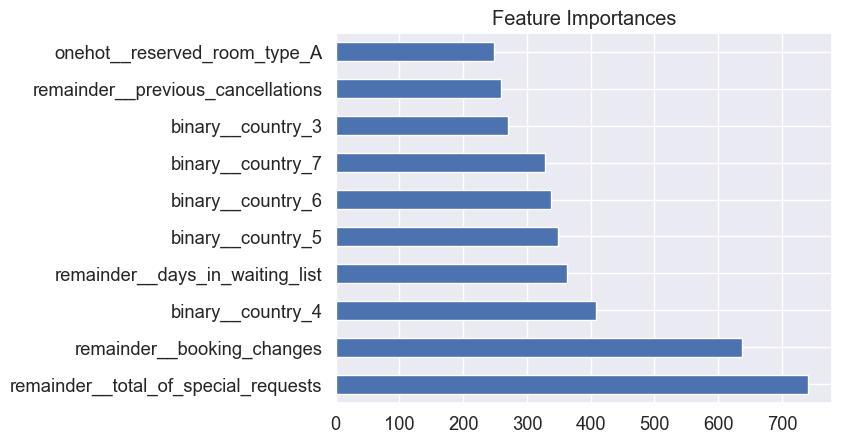

In [60]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Dalam feautures importance penilaiaian yang dapat menjadi pemilihan terbaik dalam kemungkinan orang tersebut menginap adalah total of special request dan juga booking changes yang dipilih hal ini menjadi masuk akal, karena kebanyakan orang yang memilih untuk terlalu banyak special request dan bila sudah memilih pembayaran akan mungkin untuk menginap dihotel tersebut diikuti dengan negara asalnya.

## kesimpulan dari model

In [61]:
print('Classification Report Tuned LGBM : \nn', report_tuned)

Classification Report Tuned LGBM : 
n               precision    recall  f1-score   support

           0       0.87      0.81      0.83     10559
           1       0.70      0.78      0.74      6156

    accuracy                           0.80     16715
   macro avg       0.78      0.80      0.79     16715
weighted avg       0.81      0.80      0.80     16715



-Model yang sudah dibuat dinilai memiliki nilai ketepatan bisa memprediksi  sekitar 70 % dari berapa orang yang memilih untuk membatalkan pesanan yang sudah dibuat, namun juga memiliki sekitar ketepatan prediksi 87 % bahwa pesanan yang terjadi benar-benar untuk orang yang mengninap

- dan dari model yang digunakan bisa untuk menyaring sekitar 78 % orang yang membatalkan pesanannya dan sekitar 81 % untuk pelanggan yang berniat untuk memesan dan menginap dihotel portugal tersebut.

# Saran untuk Bisnis perhotelan

 Untuk membuat para pemesanan (booking) kemungkinan menginap, prioritaskan untuk yang pemesanan yang sudah memilih untuk membayar lebih dulu dan beri denda bila tidak jadi menginap dengan pemotongan dari beberapa harga yang sudah dibayarkan.

 memperiotaskan orang yang memesan banyak juga penting namun juga diutamakan fitur pembayaran terlebih dahulu agar bisnis hotel tidak memiliki kerugian yang signifikan terhadap pemesanan yang sudah disiapkan.

 memperhatikan juga asal negara sebagai urutan prioritas berdasarkan data diatas.